# Graph V

<img src="images/looping.png" width="600" height="300">

In [11]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict
from IPython.display import Image, display

In [12]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [13]:
def Greeting(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0 
    return state

def GetRandom(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    return state

def Rout(state: AgentState) -> str:
    """Routing function to decide what to do next"""
    if state["counter"] < 5:
        return "loop"
    else:
        return "exit"

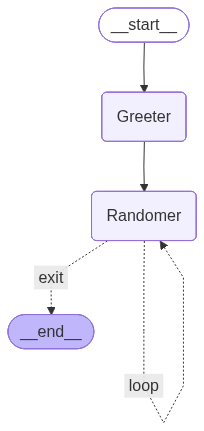

In [14]:
graph = StateGraph(AgentState)

graph.add_node("Greeter", Greeting)
graph.add_node("Randomer", GetRandom)
graph.add_edge("Greeter", "Randomer")  # direct edge from Greeter to Randomer

# Add conditional edges on "Randomer" with Rout deciding next state
graph.add_conditional_edges(
    "Randomer",
    Rout,
    {"loop": "Randomer", "exit": END}
)

graph.set_entry_point("Greeter")
app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

{'name': 'Hi there, Vaibhav', 'number': [0, 5, 6, 3, 0], 'counter': 5}